In [1]:
from csv import DictReader

with open('pca_results.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows = [r for r in reader]
csv_file.close()

with open('pca_results_no_outliers.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows_no = [r for r in reader]
csv_file.close()

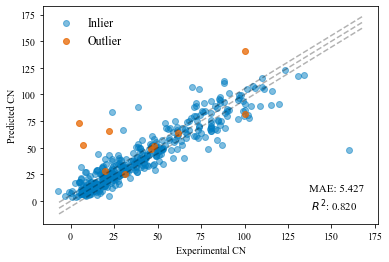

In [2]:
from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import median_absolute_error, r2_score

OUTLIERS = [2, 112, 119, 252, 291, 349, 350, 360, 367, 406]

rows_i = []
rows_o = []
for i in range(len(rows)):
    if i in OUTLIERS:
        rows_o.append(rows[i])
    else:
        rows_i.append(rows[i])

pred = [float(r['pred']) for r in rows]
actual = [float(r['actual']) for r in rows]
vars = [float(r['var']) for r in rows]

pred_i = [float(r['pred']) for r in rows_i]
actual_i = [float(r['actual']) for r in rows_i]
vars_i = [float(r['var']) for r in rows_i]

pred_o = [float(r['pred']) for r in rows_o]
actual_o = [float(r['actual']) for r in rows_o]
vars_o = [float(r['var']) for r in rows_o]

mae = median_absolute_error(actual, pred)
r2 = r2_score(actual, pred)

min_val = min(actual) - 0.05 * min(actual)
max_val = max(actual) + 0.05 * max(actual)

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val + mae, max_val + mae], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val - mae, max_val - mae], 'k--', alpha=0.3)
plt.scatter(actual_i, pred_i, color=(0, 114/235, 178/235), alpha=0.5, marker='o', label='Inlier')
plt.scatter(actual_o, pred_o, color=(213/235, 94/235, 0), alpha=0.75, marker='o', label='Outlier')
plt.xlabel('Experimental CN')
plt.ylabel('Predicted CN')
plt.legend(loc='upper left', fontsize=12, frameon=False)
string = 'MAE: {:.3f} \n $R^2$: {:.3f}'.format(mae, r2)
plt.rcParams.update({'font.size': 11})
text_box = AnchoredText(string, frameon=True, loc=4, pad=0.5)
plt.setp(text_box.patch, facecolor='white', edgecolor='w', alpha=0.0)
plt.gca().add_artist(text_box)
plt.show()

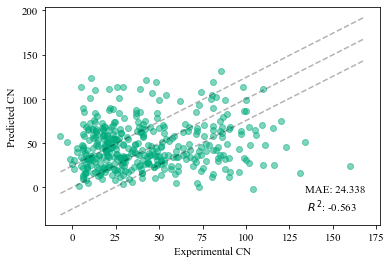

In [3]:
pred = [float(r['pred']) for r in rows_no]
actual = [float(r['actual']) for r in rows_no]
vars = [float(r['var']) for r in rows_no]

mae = median_absolute_error(actual, pred)
r2 = r2_score(actual, pred)

min_val = min(actual) - 0.05 * min(actual)
max_val = max(actual) + 0.05 * max(actual)

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val + mae, max_val + mae], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val - mae, max_val - mae], 'k--', alpha=0.3)
plt.scatter(actual, pred, color=(0, 158/235, 115/235), alpha=0.5, marker='o')
plt.xlabel('Experimental CN')
plt.ylabel('Predicted CN')
string = 'MAE: {:.3f} \n $R^2$: {:.3f}'.format(mae, r2)
plt.rcParams.update({'font.size': 11})
text_box = AnchoredText(string, frameon=True, loc=4, pad=0.5)
plt.setp(text_box.patch, facecolor='white', edgecolor='w', alpha=0.0)
plt.gca().add_artist(text_box)
plt.show()